In [8]:
#import pandas library
import pandas as pd

In [9]:
file_path = r'D:\Academics\6th semester\Machine Learning\LAB\Lab-1\iphone_purchase_records.csv'

In [10]:
df =pd.read_csv(file_path)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.6+ KB


In [12]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,No
1,Male,35,20000,No
2,Female,26,43000,No
3,Female,27,57000,No
4,Male,19,76000,No


In [13]:
#data preprocessing

In [14]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [47]:
#checking Null values
df.isnull().sum()*100/df.shape[0]
#there are no NULL values in the dataset, hence it is clean

Gender             0.0
Age                0.0
Salary             0.0
Purchase Iphone    0.0
dtype: float64

In [15]:
 Purchase_Iphone= {'Yes':1, 'No':0}
df=df.replace(Purchase_Iphone)

In [16]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [18]:
import seaborn as sns

<Axes: xlabel='Salary', ylabel='Age'>

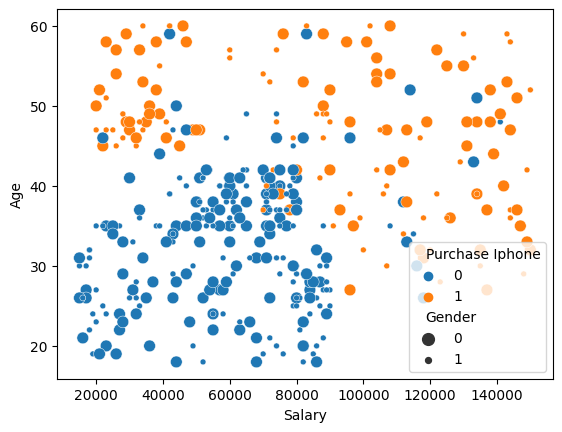

In [44]:
#plot the dataset
sns.scatterplot(x='Salary', y='Age',data=df, size='Gender', hue='Purchase Iphone')

In [35]:
gender_dict = {'Male':1, 'Female':0}
df = df.replace(gender_dict)

In [21]:
#Looks Like datas are forming a clauster, we can apply KNN algorithm around the clauster
X = df.drop('Purchase Iphone', axis=1)
y = df['Purchase Iphone']

In [26]:
import numpy as np

In [28]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.0/10.6 MB 487.6 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 491.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 476.3 kB/s eta 0:00:23
   ---------------------------------------- 0.1/10.6 MB 504.4 kB/s eta 0:00:21
    --------------------------------------- 0.1/10.6 MB 500.5 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.6 MB 458.0 kB/s eta 0:00:23
    --------------------------------------- 0.2/10.6 MB 491.5 kB/s eta 0:00:22
    --------------------------------------- 0.2/10.6 MB 479.2 kB/s eta 0:00:22
    --------------------------------------- 0.2/10.6 MB 474.7 kB/s eta 0:00:22
    --------------------------------------- 0.3/10.6 MB 476.3 kB/s eta 0:00:22
   - -------------------------------------- 0.3/10.6 MB 486.7

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [32]:
#We need to scale the data for better performance
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler()

In [34]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
#Looks Like datas are forming a clauster, we can apply KNN algorithm around the clauster
# Apply the KNN model 
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_basic = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn_basic.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
knn_basic_prediction = knn_basic.predict(scaled_X_test)

In [40]:
#validate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
confusion_matrix(knn_basic_prediction, y_test)

array([[72,  4],
       [ 8, 36]], dtype=int64)

In [42]:
print(classification_report(knn_basic_prediction, y_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        76
           1       0.90      0.82      0.86        44

    accuracy                           0.90       120
   macro avg       0.90      0.88      0.89       120
weighted avg       0.90      0.90      0.90       120



In [46]:
#In the basic knn model we achieve 90% of accuracy.by using gender,salary,age based on this feature you can predict purchase chasem